In [1]:
import pymrio as mr
import pandas as pd
import numpy as np
from scipy.linalg import block_diag
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
%matplotlib inline

### Importer les données

In [66]:
EXIOBASE_PATH = '../EXIOBASE/' # ne pas hésiter à changer

In [67]:
year = 2019
filename = EXIOBASE_PATH+'IOT_{}_ixi.zip'.format(year)

In [68]:
io = mr.parse_exiobase3(path=filename)

In [69]:
population = pd.read_csv(EXIOBASE_PATH+'exiobase_population.txt',sep='\t',index_col=0)
io.population=pd.DataFrame(columns=['population'], data=population.loc[year].values, index=population.columns).T

In [70]:
io.calc_all()

C:\Users\Gibon\.conda\envs\io\lib\site-packages\pymrio\core\mriosystem.py:878: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  Y_agg = Y.sum(level="region", axis=1).reindex(
C:\Users\Gibon\.conda\envs\io\lib\site-packages\pymrio\core\mriosystem.py:928: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  F_Y_agg = self.F_Y.sum(level="region", axis=1).reindex(


### Agrégation des régions

Cette section consiste à agréger les régions entre elles. La fonctionnalité existe dans `pymrio`, il suffit d'assigner chaque région de la nomenclature existante à une nouvelle région pour préparer l'agrégation. La fonction `aggregate` s'occupe du reste.

In [71]:
io.get_regions()

Index(['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GR',
       'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'PL', 'PT', 'RO',
       'SE', 'SI', 'SK', 'GB', 'US', 'JP', 'CN', 'CA', 'KR', 'BR', 'IN', 'MX',
       'RU', 'AU', 'CH', 'TR', 'TW', 'NO', 'ID', 'ZA', 'WA', 'WL', 'WE', 'WF',
       'WM'],
      dtype='object', name='region')

In [72]:
new_regions = ['EUR'] * 28 + ['NAM'] + ['APAC'] + ['CN'] + ['NAM'] + ['APAC'] + ['LAM'] + ['IN'] + ['NAM'] + ['RU'] + ['APAC'] + ['EUR'] + ['EUR'] + ['APAC'] + ['EUR'] + ['APAC'] + ['AFR'] + ['APAC'] + ['LAM'] + ['EUR'] + ['AFR'] + ['MEA']

In [73]:
io_agg = io.aggregate(region_agg=new_regions, inplace=False)

C:\Users\Gibon\.conda\envs\io\lib\site-packages\pymrio\core\mriosystem.py:878: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  Y_agg = Y.sum(level="region", axis=1).reindex(
C:\Users\Gibon\.conda\envs\io\lib\site-packages\pymrio\core\mriosystem.py:960: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  self.D_cba.sum(level="region", axis=1).reindex(
C:\Users\Gibon\.conda\envs\io\lib\site-packages\pymrio\core\mriosystem.py:972: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  self.D_pba.sum(level="region", axis=1).reind

In [75]:
io_agg.get_regions()

Index(['EUR', 'NAM', 'APAC', 'CN', 'LAM', 'IN', 'RU', 'AFR', 'MEA'], dtype='object', name='region')

In [76]:
io_agg.calc_all()

C:\Users\Gibon\.conda\envs\io\lib\site-packages\pymrio\core\mriosystem.py:878: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  Y_agg = Y.sum(level="region", axis=1).reindex(
C:\Users\Gibon\.conda\envs\io\lib\site-packages\pymrio\core\mriosystem.py:928: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  F_Y_agg = self.F_Y.sum(level="region", axis=1).reindex(


### Zoom sur un indicateur

La dernière version d'EXIOBASE contient les facteurs de caractérisation des gaz à effet de serre. Ces facteurs représentent le forçage radiatif cumulé généré par chaque gaz, sur 100 ans, comparé à celui du dioxyde de carbone. C'est le pouvoir de réchauffement global à 100 ans, en anglais GWP100.

La fonction `diag_stressor` permet de détailler l'origine des émissions pour un "stressor" (dans ce cas une catégorie d'impact) donné.

Celui qui nous intéresse est `GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)`.

In [77]:
# Créons l'extension correspondante
GHG = io_agg.impacts.diag_stressor('GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)',
                             name = 'GHG')

In [78]:
# Connecter l'extension au système existant
io_agg.GHG = GHG

In [79]:
# Recalcul des impacts
io_agg.calc_all()

C:\Users\Gibon\.conda\envs\io\lib\site-packages\pymrio\core\mriosystem.py:960: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  self.D_cba.sum(level="region", axis=1).reindex(
C:\Users\Gibon\.conda\envs\io\lib\site-packages\pymrio\core\mriosystem.py:972: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  self.D_pba.sum(level="region", axis=1).reindex(
C:\Users\Gibon\.conda\envs\io\lib\site-packages\pymrio\core\mriosystem.py:983: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  self.D_imp_reg = self.D_imp.sum(level="regi

In [80]:
# Vérifier que les calculs se sont bien déroulés
io_agg.meta

Description: Data for 2019
MRIO Name: exio381_ntnu_copy
System: ixi
Version: v3.81
File: None
History:
20211013 17:45:40 - MODIFICATION -  Calculating accounts for extension GHG
20211013 17:45:40 - MODIFICATION -  Calculating accounts for extension satellite
20211013 17:45:40 - MODIFICATION -  Calculating accounts for extension impacts
20211013 17:45:19 - MODIFICATION -  Calculating accounts for extension satellite
20211013 17:45:19 - MODIFICATION -  Calculating accounts for extension impacts
20211013 17:45:19 - MODIFICATION -  Leontief matrix L calculated
20211013 17:45:19 - MODIFICATION -  Coefficient matrix A calculated
20211013 17:44:10 - MODIFICATION -  Calculating accounts for extension satellite
20211013 17:44:10 - MODIFICATION -  Calculating accounts for extension impacts
20211013 17:44:07 - MODIFICATION -  Aggregate extensions...
 ... (more lines in history)

In [98]:
# Récupérer les flux de GES liés à la consommation finale
GHG_flows = io_agg.GHG.D_cba.groupby('region', axis=1).sum().groupby('region').sum()*1e-9

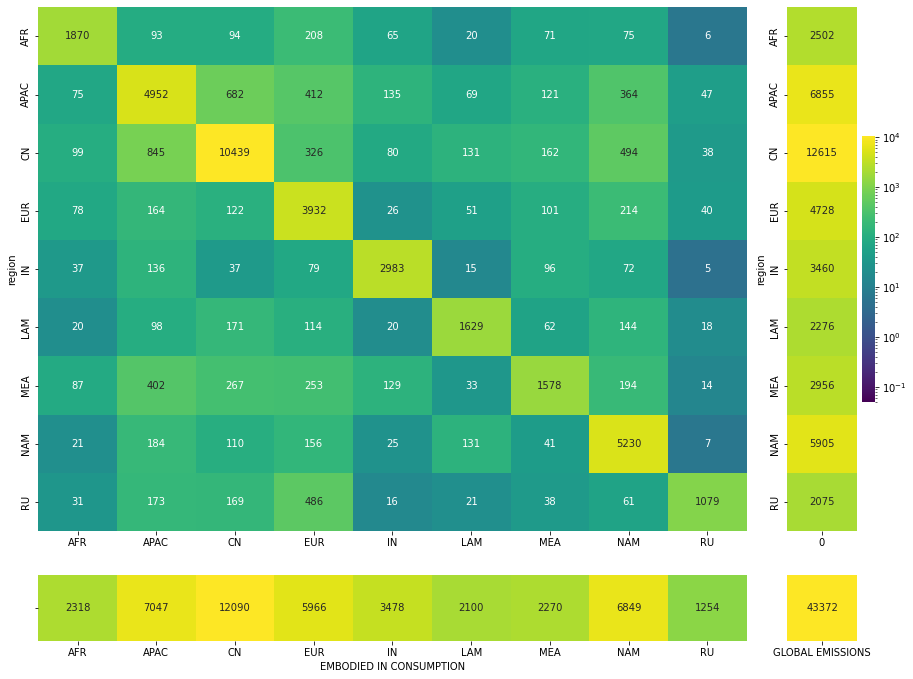

In [122]:
cmap  = 'viridis'

fig, ax = plt.subplots(ncols=2,
                       nrows=2,
                       figsize=(15, 10),
                       subplot_kw={'facecolor':'w'},
                       gridspec_kw={'width_ratios': [8, 1],
                                    'height_ratios': [8, 1],
                                    'wspace': 2/3*0.15,
                                    'hspace': 0.15,
                                    'bottom': 0})

sns.heatmap(GHG_flows, annot=True,
            norm=matplotlib.colors.LogNorm(vmin=.05,
                                           vmax=GHG_flows.max().max()),
            cbar=False,
            cmap=cmap,
           fmt='.0f',
           ax=ax[0,0])
sns.heatmap(pd.DataFrame(GHG_flows.sum(axis=1)), annot=True,
            norm=matplotlib.colors.LogNorm(vmin=.05,
                                           vmax=GHG_flows.max().max()),
            
            cmap=cmap,
           fmt='.0f',
           ax=ax[0,1])
sns.heatmap(pd.DataFrame(GHG_flows.sum()).T, annot=True,
#             annot_kws={'rotation': 90},
            norm=matplotlib.colors.LogNorm(vmin=.05,
                                           vmax=GHG_flows.max().max()),
            cbar=False,
            cmap=cmap,
           fmt='.0f',
           ax=ax[1,0])
sns.heatmap([[GHG_flows.sum().sum()]], annot=True,
            norm=matplotlib.colors.LogNorm(vmin=.05,
                                           vmax=GHG_flows.max().max()),
            cbar=False,
            cmap=cmap,
            yticklabels=[],
            xticklabels=['GLOBAL EMISSIONS'],
           fmt='.0f',
           ax=ax[1,1])

ax[0,0].set_xlabel('')
ax[1,1].set_xlabel('')
ax[1,0].set_xlabel('EMBODIED IN CONSUMPTION')
ax[1,0].set_ylabel('')
ax[1,0].set_yticklabels([])

# resize the corner box
ax01pos = ax[0,1].get_position().bounds
ax11pos = list(ax[1,1].get_position().bounds)
ax11pos[2] = ax01pos[2]
ax[1,1].set_position(ax11pos)

# fig.savefig('GHG_in_trade_{}.png'.format(year),
#             facecolor='white',
#             edgecolor='none')